# Exploration Of PISA 2012 
## by Bassem Sherif

## Preliminary Wrangling

> PISA is a survey of students' skills and knowledge as they approach the end of compulsory education. The shape of the dataset is (), And The columns are including Survey contrast coding, The file to transfer coding included in project folder.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

import warnings

warnings.filterwarnings('ignore')

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
pisa=pd.read_csv('pisa2012.csv', low_memory=False )

In [3]:
print(pisa.info())
print(pisa.shape)
print(pisa.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Columns: 636 entries, Unnamed: 0 to VER_STU
dtypes: float64(250), int64(18), object(368)
memory usage: 2.3+ GB
None
(485490, 636)
Unnamed: 0      int64
CNT            object
SUBNATIO        int64
STRATUM        object
OECD           object
               ...   
W_FSTR80      float64
WVARSTRR        int64
VAR_UNIT        int64
SENWGT_STU    float64
VER_STU        object
Length: 636, dtype: object


In [4]:
pisa.head(3)

,Unnamed: 0,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,...,W_FSTR75,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU,VER_STU
0,1,Albania,80000,ALB0006,Non-OECD,Albania,1,1,10,1.0,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
1,2,Albania,80000,ALB0006,Non-OECD,Albania,1,2,10,1.0,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
2,3,Albania,80000,ALB0006,Non-OECD,Albania,1,3,9,1.0,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13


In [5]:
pisa.describe()

,Unnamed: 0,SUBNATIO,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,ST03Q01,ST03Q02,ST06Q01,ST115Q01,...,W_FSTR74,W_FSTR75,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU
count,485490.000000,4.854900e+05,485490.000000,485490.000000,485490.000000,485438.000000,485490.000000,485490.000000,457994.000000,479269.000000,...,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000
mean,242745.500000,4.315457e+06,240.152197,6134.066201,9.813323,2.579260,6.558512,1996.070061,6.148963,1.265356,...,50.844201,51.020378,50.943149,50.685275,51.019842,50.540724,50.721164,40.013920,1.531189,0.140054
std,140149.035431,2.524434e+06,278.563016,6733.144944,3.734726,2.694013,3.705244,0.255250,0.970693,0.578992,...,120.684726,122.946533,121.170883,119.267686,122.981541,119.479516,119.799018,22.951264,0.539759,0.137864
min,1.000000,8.000000e+04,1.000000,1.000000,7.000000,1.000000,1.000000,1996.000000,4.000000,1.000000,...,0.292900,0.292900,0.292900,0.292900,0.292900,0.292900,0.292900,1.000000,1.000000,0.000500
25%,121373.250000,2.030000e+06,61.000000,1811.000000,9.000000,1.000000,4.000000,1996.000000,6.000000,1.000000,...,4.660300,4.664800,4.643100,4.667000,4.675200,4.651850,4.660300,20.000000,1.000000,0.037800
50%,242745.500000,4.100000e+06,136.000000,3740.000000,10.000000,1.000000,7.000000,1996.000000,6.000000,1.000000,...,13.637700,13.698900,13.611700,13.672100,13.731100,13.582000,13.600200,40.000000,2.000000,0.145200
75%,364117.750000,6.880000e+06,291.000000,7456.000000,10.000000,3.000000,9.000000,1996.000000,7.000000,1.000000,...,41.233500,41.512500,41.695200,41.097300,41.189600,41.290925,41.356000,60.000000,2.000000,0.199900
max,485490.000000,8.580000e+06,1471.000000,33806.000000,96.000000,25.000000,99.000000,1997.000000,16.000000,4.000000,...,2476.566800,4155.283000,3743.450100,3232.163700,3904.868100,3607.478300,3412.174100,80.000000,3.000000,5.095500


In [6]:
print(pisa['CNT'].nunique())
print(pisa['NC'].nunique())
print(pisa['CNT'].unique())
print(pisa['NC'].unique())

68
66
['Albania' 'United Arab Emirates' 'Argentina' 'Australia' 'Austria'
 'Belgium' 'Bulgaria' 'Brazil' 'Canada' 'Switzerland' 'Chile' 'Colombia'
 'Costa Rica' 'Czech Republic' 'Germany' 'Denmark' 'Spain' 'Estonia'
 'Finland' 'France' 'United Kingdom' 'Greece' 'Hong Kong-China' 'Croatia'
 'Hungary' 'Indonesia' 'Ireland' 'Iceland' 'Israel' 'Italy' 'Jordan'
 'Japan' 'Kazakhstan' 'Korea' 'Liechtenstein' 'Lithuania' 'Luxembourg'
 'Latvia' 'Macao-China' 'Mexico' 'Montenegro' 'Malaysia' 'Netherlands'
 'Norway' 'New Zealand' 'Peru' 'Poland' 'Portugal' 'Qatar'
 'China-Shanghai' 'Perm(Russian Federation)' 'Florida (USA)'
 'Connecticut (USA)' 'Massachusetts (USA)' 'Romania' 'Russian Federation'
 'Singapore' 'Serbia' 'Slovak Republic' 'Slovenia' 'Sweden'
 'Chinese Taipei' 'Thailand' 'Tunisia' 'Turkey' 'Uruguay'
 'United States of America' 'Vietnam']
['Albania' 'United Arab Emirates ' 'Argentina' 'Australia' 'Austria'
 'Belgium' 'Bulgaria ' 'Brazil ' 'Canada ' 'Switzerland' 'Chile'
 'Colombia ' '

In [7]:
ps = pisa
ps.loc[pisa['CNT']=='Florida (USA)', 'CNT'] = 'USA'
ps.loc[pisa['CNT']=='Connecticut (USA)', 'CNT'] = 'USA'
ps.loc[pisa['CNT']=='Massachusetts (USA)', 'CNT'] = 'USA'
ps.loc[pisa['CNT']=='United States of America', 'CNT'] = 'USA'
ps.loc[pisa['CNT']=='United Arab Emirates', 'CNT'] = 'UAE'
ps.loc[pisa['CNT']=='United Kingdom', 'CNT'] = 'UK'
ps.loc[pisa['CNT']=='Perm(Russian Federation)', 'CNT'] = 'Russian'
ps.loc[pisa['CNT']=='Russian Federation', 'CNT'] = 'Russian'
ps.loc[pisa['CNT']=='Macao-China', 'CNT'] = 'China'
ps.loc[pisa['CNT']=='Hong Kong-China', 'CNT'] = 'China'
ps.loc[pisa['CNT']=='China-Shanghai', 'CNT'] = 'China'
ps.loc[pisa['CNT']=='Chinese Taipei', 'CNT'] = 'Taiwan'
print(ps['CNT'].unique())
print(ps['CNT'].nunique())

['Albania' 'UAE' 'Argentina' 'Australia' 'Austria' 'Belgium' 'Bulgaria'
 'Brazil' 'Canada' 'Switzerland' 'Chile' 'Colombia' 'Costa Rica'
 'Czech Republic' 'Germany' 'Denmark' 'Spain' 'Estonia' 'Finland' 'France'
 'UK' 'Greece' 'China' 'Croatia' 'Hungary' 'Indonesia' 'Ireland' 'Iceland'
 'Israel' 'Italy' 'Jordan' 'Japan' 'Kazakhstan' 'Korea' 'Liechtenstein'
 'Lithuania' 'Luxembourg' 'Latvia' 'Mexico' 'Montenegro' 'Malaysia'
 'Netherlands' 'Norway' 'New Zealand' 'Peru' 'Poland' 'Portugal' 'Qatar'
 'Russian' 'USA' 'Romania' 'Singapore' 'Serbia' 'Slovak Republic'
 'Slovenia' 'Sweden' 'Taiwan' 'Thailand' 'Tunisia' 'Turkey' 'Uruguay'
 'Vietnam']
62


In [8]:
for col in ps.columns:
    print(col)

Unnamed: 0
CNT
SUBNATIO
STRATUM
OECD
NC
SCHOOLID
STIDSTD
ST01Q01
ST02Q01
ST03Q01
ST03Q02
ST04Q01
ST05Q01
ST06Q01
ST07Q01
ST07Q02
ST07Q03
ST08Q01
ST09Q01
ST115Q01
ST11Q01
ST11Q02
ST11Q03
ST11Q04
ST11Q05
ST11Q06
ST13Q01
ST14Q01
ST14Q02
ST14Q03
ST14Q04
ST15Q01
ST17Q01
ST18Q01
ST18Q02
ST18Q03
ST18Q04
ST19Q01
ST20Q01
ST20Q02
ST20Q03
ST21Q01
ST25Q01
ST26Q01
ST26Q02
ST26Q03
ST26Q04
ST26Q05
ST26Q06
ST26Q07
ST26Q08
ST26Q09
ST26Q10
ST26Q11
ST26Q12
ST26Q13
ST26Q14
ST26Q15
ST26Q16
ST26Q17
ST27Q01
ST27Q02
ST27Q03
ST27Q04
ST27Q05
ST28Q01
ST29Q01
ST29Q02
ST29Q03
ST29Q04
ST29Q05
ST29Q06
ST29Q07
ST29Q08
ST35Q01
ST35Q02
ST35Q03
ST35Q04
ST35Q05
ST35Q06
ST37Q01
ST37Q02
ST37Q03
ST37Q04
ST37Q05
ST37Q06
ST37Q07
ST37Q08
ST42Q01
ST42Q02
ST42Q03
ST42Q04
ST42Q05
ST42Q06
ST42Q07
ST42Q08
ST42Q09
ST42Q10
ST43Q01
ST43Q02
ST43Q03
ST43Q04
ST43Q05
ST43Q06
ST44Q01
ST44Q03
ST44Q04
ST44Q05
ST44Q07
ST44Q08
ST46Q01
ST46Q02
ST46Q03
ST46Q04
ST46Q05
ST46Q06
ST46Q07
ST46Q08
ST46Q09
ST48Q01
ST48Q02
ST48Q03
ST48Q04
ST48Q05
ST49Q0

In [9]:
ps['ST26Q02'].sample(n=10, random_state=1)

366892    Yes
423216     No
402683    Yes
130418    Yes
452879    Yes
154640    Yes
278390    Yes
266647    Yes
301951    Yes
270464    Yes
Name: ST26Q02, dtype: object

In [10]:
show = pisa[['ST26Q15']]
show.sample(10)

,ST26Q15
33648,36002
440236,705002
224112,360002
349731,499001
409230,840002
58347,76001
178742,246001
176439,246001
315064,446001
73899,76002


In [11]:
ps['ST26Q02'].value_counts()


Yes    372241
No      97452
Name: ST26Q02, dtype: int64

## Now we will chose the main variables which help us to support our investigation

In [12]:
pss = ps[['CNT','ST01Q01','AGE','ST04Q01','ST08Q01','ST115Q01','ST19Q01','ST15Q01','ST26Q15','ST28Q01','ST11Q01','ST11Q02','COBN_S','COBN_M',
          'COBN_F','PV1MATH','PV2MATH','PV3MATH','PV4MATH','PV5MATH','PV1READ','PV2READ','PV3READ','PV4READ',
          'PV5READ','PV1SCIE','PV2SCIE','PV3SCIE','PV4SCIE','PV5SCIE']]
pss.sample(5)

,CNT,ST01Q01,AGE,ST04Q01,ST08Q01,ST115Q01,ST19Q01,ST15Q01,ST26Q15,ST28Q01,...,PV1READ,PV2READ,PV3READ,PV4READ,PV5READ,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE
408985,USA,10,15.75,Female,None,1.0,Working full-time <for pay>,Working full-time <for pay>,840001,26-100 books,...,625.2054,579.9298,624.4111,569.6037,553.7175,560.8355,510.4812,576.6878,555.2406,466.6542
354893,Malaysia,10,16.00,Female,None,3.0,Working full-time <for pay>,"Other (e.g. home duties, retired)",458001,26-100 books,...,264.5886,310.6586,282.0635,251.8797,312.2472,315.9642,332.7490,358.8586,312.2342,316.8967
55991,Brazil,9,15.75,Male,Five or more times,2.0,Working part-time <for pay>,Working full-time <for pay>,76002,0-10 books,...,383.1511,462.5437,433.6736,449.7125,509.0565,374.6177,439.8918,385.8075,410.9847,415.6471
288139,Kazakhstan,9,15.83,Male,None,1.0,Working full-time <for pay>,"Other (e.g. home duties, retired)",398002,11-25 books,...,289.4839,393.7368,319.9578,340.8084,404.1621,318.6684,372.7527,302.8161,353.1705,327.0608
185695,France,11,16.00,Male,One or two times,1.0,Working full-time <for pay>,Working full-time <for pay>,250002,11-25 books,...,633.4382,647.8732,636.6459,669.5257,614.9934,657.8142,645.6919,628.9071,648.4894,639.1645


In [13]:
pavg=pss[['PV1MATH','PV2MATH','PV3MATH','PV4MATH','PV5MATH','PV1READ','PV2READ','PV3READ','PV4READ',
          'PV5READ','PV1SCIE','PV2SCIE','PV3SCIE','PV4SCIE','PV5SCIE']]
pavg.sample(5)

,PV1MATH,PV2MATH,PV3MATH,PV4MATH,PV5MATH,PV1READ,PV2READ,PV3READ,PV4READ,PV5READ,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE
212296,487.7785,504.1362,485.4417,516.5992,514.2623,529.9872,553.2437,555.6495,545.2242,523.5717,535.6583,500.2238,580.4178,597.2025,570.1604
111840,324.9805,275.9075,317.1912,286.0337,314.8543,382.2260,345.6877,359.9853,355.2194,379.8430,334.5207,290.6938,294.4237,234.7445,322.3984
85287,603.1391,569.6448,576.6552,567.3080,609.3706,658.6192,584.0383,588.8500,608.8986,624.9375,638.5117,567.6427,557.3853,570.4401,599.3473
54010,506.9403,492.1405,520.1823,503.8246,508.4982,509.8584,422.4464,460.1378,525.0954,464.1476,488.3812,463.2040,493.0436,521.0183,453.8791
329922,424.6066,444.0801,418.3751,426.1645,414.4804,413.1246,501.2931,429.0108,454.4288,444.8970,459.4741,476.2589,398.8624,408.1872,400.7273


In [14]:
pss.columns

Index(['CNT', 'ST01Q01', 'AGE', 'ST04Q01', 'ST08Q01', 'ST115Q01', 'ST19Q01',
       'ST15Q01', 'ST26Q15', 'ST28Q01', 'ST11Q01', 'ST11Q02', 'COBN_S',
       'COBN_M', 'COBN_F', 'PV1MATH', 'PV2MATH', 'PV3MATH', 'PV4MATH',
       'PV5MATH', 'PV1READ', 'PV2READ', 'PV3READ', 'PV4READ', 'PV5READ',
       'PV1SCIE', 'PV2SCIE', 'PV3SCIE', 'PV4SCIE', 'PV5SCIE'],
      dtype='object')

## Here we should rename our variables for better visualisation

In [15]:
mask = pss
mask = mask.rename(columns = {'CNT': 'Country', 'ST01Q01': 'Grade','AGE': 'Age','ST04Q01': 'Gender',
                              'ST08Q01': 'Arrive school Late','ST115Q01': 'Skipped Classes',
                              'ST11Q01': 'Mother at Home', 'ST11Q02': 'Father at Home', 
                              'ST19Q01': 'Father Job','ST15Q01': 'Mother Job','ST28Q01': 'Books at home',
                              'COBN_S': 'Birth country','COBN_M': 'Mother birth country',
                              'COBN_F': 'Father birth country','ST26Q15': 'Wealth',
                              'ST19Q01': 'Father Job','ST15Q01': 'Mother Job'}, inplace = False)
mask.head(2)

,Country,Grade,Age,Gender,Arrive school Late,Skipped Classes,Father Job,Mother Job,Wealth,Books at home,...,PV1READ,PV2READ,PV3READ,PV4READ,PV5READ,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE
0,Albania,10,16.17,Female,None,1.0,Working part-time <for pay>,"Other (e.g. home duties, retired)",8002,0-10 books,...,249.5762,254.3420,406.8496,175.7053,218.5981,341.7009,408.8400,348.2283,367.8105,392.9877
1,Albania,10,16.17,Female,One or two times,1.0,Working full-time <for pay>,Working full-time <for pay>,8001,201-500 books,...,406.2936,349.8975,400.7334,369.7553,396.7618,548.9929,471.5964,471.5964,443.6218,454.8116


## We will take the average score of all 5 tests of every subject 

In [16]:
mask1=mask[['PV1MATH','PV2MATH','PV3MATH','PV4MATH','PV5MATH']]
mask1['Avg Math Score']=mask1.mean(axis=1)
mask['Avg Math score']=mask1['Avg Math Score']
mask.drop(['PV1MATH','PV2MATH','PV3MATH','PV4MATH','PV5MATH'], axis = 1, inplace = True)
mask.sample()

,Country,Grade,Age,Gender,Arrive school Late,Skipped Classes,Father Job,Mother Job,Wealth,Books at home,...,PV2READ,PV3READ,PV4READ,PV5READ,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE,Avg Math score
404841,China,10,15.83,Male,One or two times,1.0,Working full-time <for pay>,Working full-time <for pay>,156011,26-100 books,...,457.0904,453.0807,421.8049,406.5679,421.2421,506.0985,487.4487,452.9467,452.0142,429.51396


In [17]:
mask1=mask[['PV1READ','PV2READ','PV3READ','PV4READ','PV5READ']]
mask1['Avg Read Score']=mask1.mean(axis=1)
mask['Avg Read score']=mask1['Avg Read Score']        
mask.drop(['PV1READ','PV2READ','PV3READ','PV4READ','PV5READ'], axis = 1, inplace = True)
mask.sample()

,Country,Grade,Age,Gender,Arrive school Late,Skipped Classes,Father Job,Mother Job,Wealth,Books at home,...,Birth country,Mother birth country,Father birth country,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE,Avg Math score,Avg Read score
104440,Switzerland,10,16.33,Female,None,1.0,Working full-time <for pay>,Working full-time <for pay>,756001,11-25 books,...,Portugal,Portugal,Portugal,540.6005,536.8706,518.2208,535.9381,483.7188,524.93378,515.27292


In [18]:
mask1=mask[['PV1SCIE','PV2SCIE','PV3SCIE','PV4SCIE','PV5SCIE']]
mask1['Avg Science Score']=mask1.mean(axis=1)
mask['Avg Science score']=mask1['Avg Science Score']        
mask.drop(['PV1SCIE','PV2SCIE','PV3SCIE','PV4SCIE','PV5SCIE'], axis = 1, inplace = True)
mask.sample()

,Country,Grade,Age,Gender,Arrive school Late,Skipped Classes,Father Job,Mother Job,Wealth,Books at home,Mother at Home,Father at Home,Birth country,Mother birth country,Father birth country,Avg Math score,Avg Read score,Avg Science score
384364,Portugal,9,16.25,Male,One or two times,2.0,Working full-time <for pay>,Working full-time <for pay>,9999999,26-100 books,Yes,Yes,Portugal,Portugal,Portugal,486.45428,491.41368,520.17902


In [19]:
mask.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Country               485490 non-null  object 
 1   Grade                 485490 non-null  int64  
 2   Age                   485374 non-null  float64
 3   Gender                485490 non-null  object 
 4   Arrive school Late    479143 non-null  object 
 5   Skipped Classes       479269 non-null  float64
 6   Father Job            451410 non-null  object 
 7   Mother Job            467751 non-null  object 
 8   Wealth                485490 non-null  int64  
 9   Books at home         473765 non-null  object 
 10  Mother at Home        460559 non-null  object 
 11  Father at Home        441036 non-null  object 
 12  Birth country         481836 non-null  object 
 13  Mother birth country  481843 non-null  object 
 14  Father birth country  481825 non-null  object 
 15  

### Now we will save our clean data in another file

In [20]:
mask.to_csv('pisa_clean_data.csv')

In [21]:
df=pd.read_csv('pisa_clean_data.csv',index_col=[0])

In [22]:
df.shape

(485490, 18)

In [23]:
df.dtypes

Country                  object
Grade                     int64
Age                     float64
Gender                   object
Arrive school Late       object
Skipped Classes         float64
Father Job               object
Mother Job               object
Wealth                    int64
Books at home            object
Mother at Home           object
Father at Home           object
Birth country            object
Mother birth country     object
Father birth country     object
Avg Math score          float64
Avg Read score          float64
Avg Science score       float64
dtype: object

In [24]:
df.sample()

,Country,Grade,Age,Gender,Arrive school Late,Skipped Classes,Father Job,Mother Job,Wealth,Books at home,Mother at Home,Father at Home,Birth country,Mother birth country,Father birth country,Avg Math score,Avg Read score,Avg Science score
402776,China,10,15.67,Male,None,1.0,"Other (e.g. home duties, retired)",Working full-time <for pay>,156011,26-100 books,Yes,Yes,China (Shanghai),China (Shanghai),China (Shanghai),746.7752,690.21586,728.59008


In [25]:
df['Mother at Home'].value_counts()

Yes    433007
No      27552
Name: Mother at Home, dtype: int64

In [26]:
df['Mother at Home'] = df['Mother at Home'].fillna('No')
df['Father at Home'] = df['Father at Home'].fillna('No')

In [27]:
print(df['Mother at Home'].value_counts())
print(df['Father at Home'].value_counts())

Yes    433007
No      52483
Name: Mother at Home, dtype: int64
Yes    372161
No     113329
Name: Father at Home, dtype: int64


### What is the structure of your dataset?

> After the cleaning phase we get a dataset of 485490 students from 62 different countries, These Columns 

### What is/are the main feature(s) of interest in your dataset?

> The question proposed in the investigation here is: 
Are there differences in achievement based on gender, location, or student attitudes?
Does The number of books in student's home make a difference in their results?
Is staying in home with parents or their help or support make a difference in results?
Is the origins of both parents and students are making a sllight difference?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>**`Age`,`Gender`, `Arrive school Late`, `Skipped Classes`, `Father Job`, `Mother Job`, `Books at home`, `Mother at Home`, `Father at Home`, `Avg Math score`,`Avg Read score`,`Avg Science score`**.

## Univariate Exploration


## Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

### The results were the combination of 5 exams in each subject, I got the average of every subject and I had to add a new column contain these averages, 'Avg Math score', 'Avg Read score', And 'Avg Science score'

### I also chose from the 268 columns of the dataset only  30 columns that contain the most important variables in my investigation, and after removing the 5 exams and adding the averages It becomes 18 columns only.

### I also saw some outliers in Wealth and Grade I had to remove them

## Univariate Exploration #1

###  What're the countries with a higher number of students applied this assessment?

In [28]:
uni = sb.color_palette()[0]

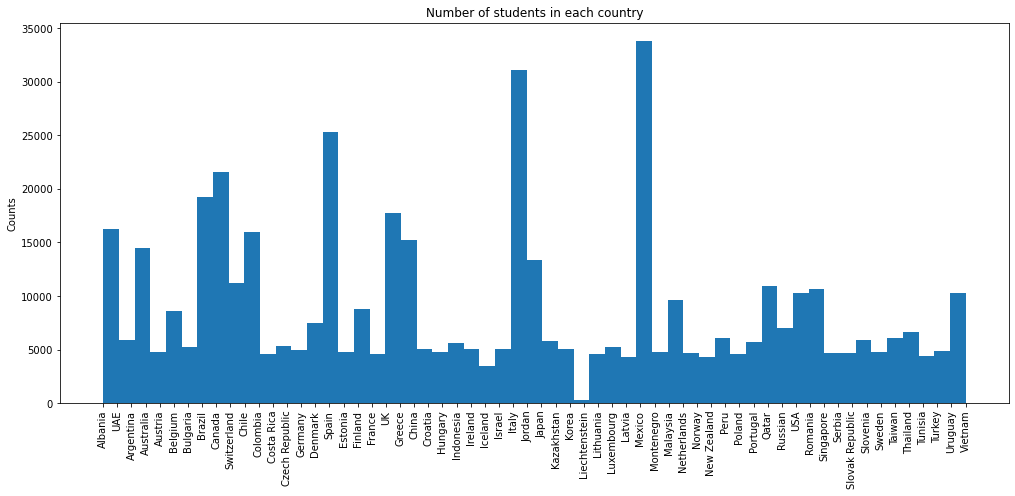

In [29]:
plt.figure(figsize = [17, 7])
plt.hist(data=df, x='Country', bins=55, color = uni);
plt.title('Number of students in each country')
plt.xticks(rotation='vertical');
plt.ylabel('Counts');

### Here we see the countries with a higher number of students applied this assessment are Mexico, Italy, Spain, Canada, Brazil, Albania, and Argentina.

## Univariate Exploration #2

### Is all the students living with their families?

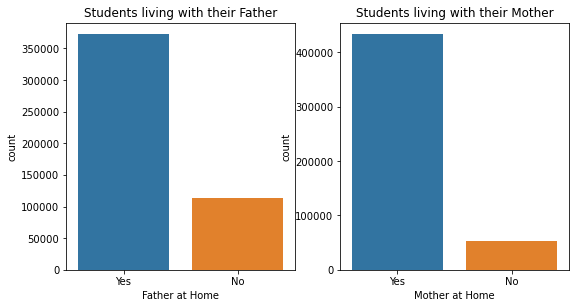

In [30]:
plt.figure(figsize = [9, 10])
plt.subplot(2,2,1)
sb.countplot(data=df, x='Father at Home');
plt.title('Students living with their Father');
plt.subplot(2,2,2)
sb.countplot(data=df, x='Mother at Home');
plt.title('Students living with their Mother');


## Bivariate Exploration

## Bivariate Exploration #1

### What're the countries that have higher scores in each subject of assessment?

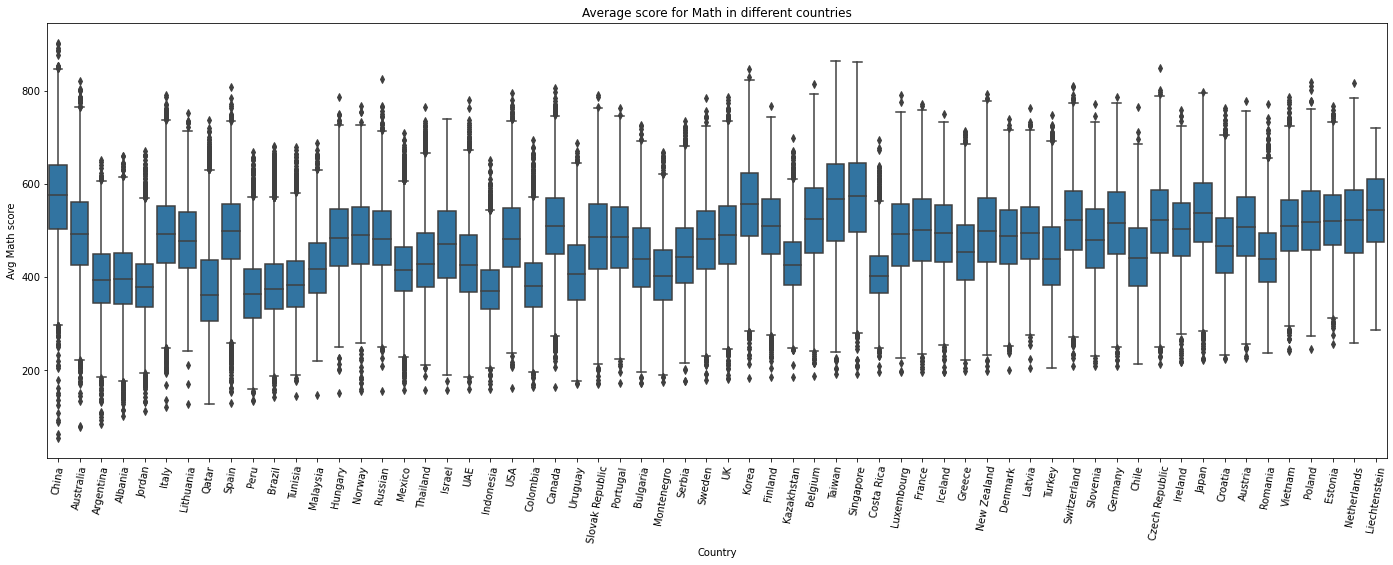

In [31]:
plt.figure(figsize = [24, 8])
df_sorted = df.sort_values(by='Avg Math score')
sb.boxplot(y = df_sorted['Avg Math score'], x = df_sorted['Country'], color=uni);
plt.title('Average score for Math in different countries');
plt.xticks(rotation=80);

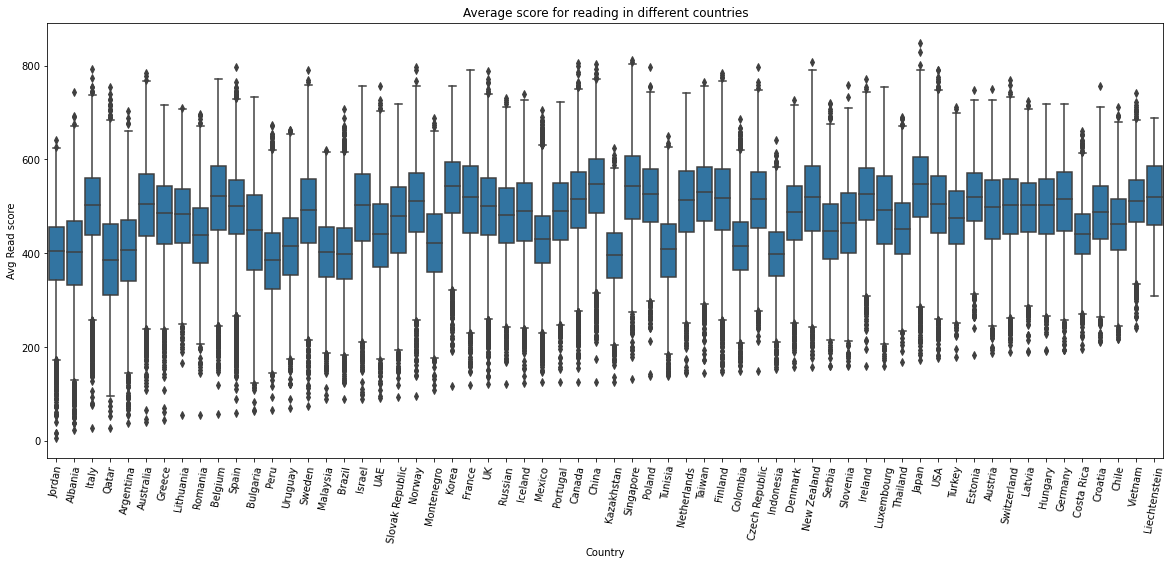

In [32]:
plt.figure(figsize = [20, 8])
df_sorted = df.sort_values(by='Avg Read score')
sb.boxplot(y = df_sorted['Avg Read score'], x = df_sorted['Country'], color=uni);
plt.title('Average score for reading in different countries');
plt.xticks(rotation=80);

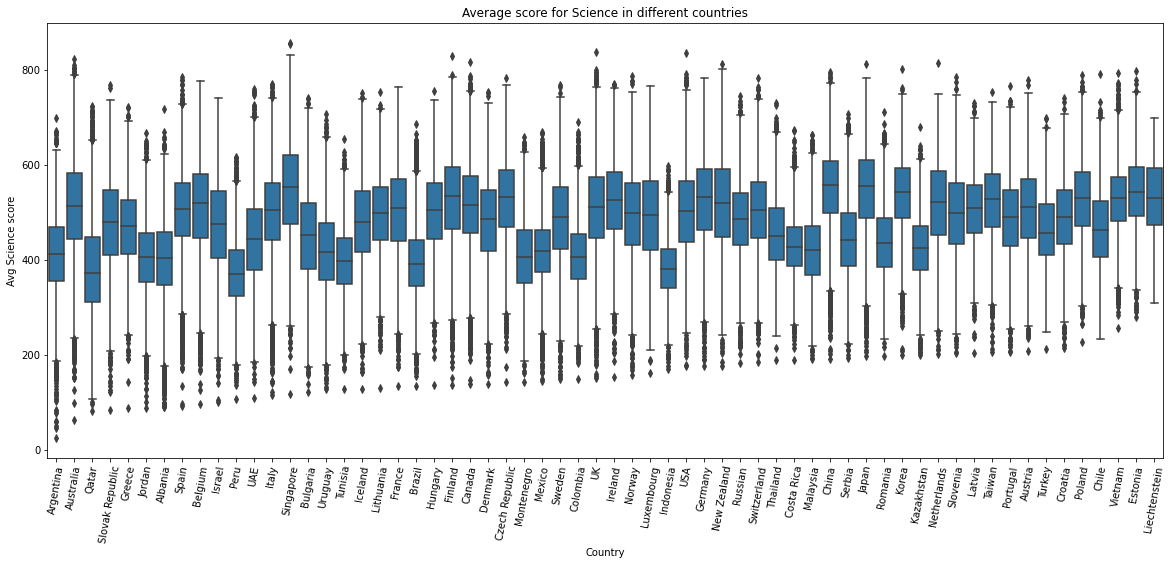

In [33]:
plt.figure(figsize = [20, 8])
df_sorted = df.sort_values(by='Avg Science score')
sb.boxplot(y = df_sorted['Avg Science score'], x = df_sorted['Country'], color=uni);
plt.title('Average score for Science in different countries');
plt.xticks(rotation=80);

### China is got the highst score in Math, Then Singapore and Taiwan are better than the most of other countries

### Sounds like Japan is the best in reading score, Ther'es not too much difference between other contries but as we see Belgium, Australia, Italy, And Korea are a little better than others

### Singapore sounds leading in Reading scores, Australia, Aussie, Belgium, China, Italy, and Japan are good too with regards to the other countries.

In [34]:
df['Grade'].sort_values(ascending =False)

481157    96
383689    96
384409    96
383669    96
383672    96
          ..
124746     7
124749     7
124750     7
124756     7
385136     7
Name: Grade, Length: 485490, dtype: int64

<AxesSubplot:xlabel='Grade'>

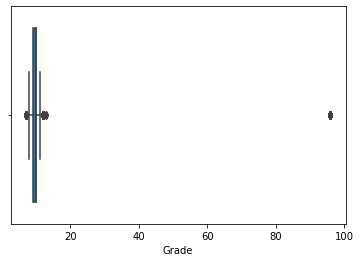

In [35]:
sb.boxplot(df['Grade'])

<AxesSubplot:xlabel='Grade'>

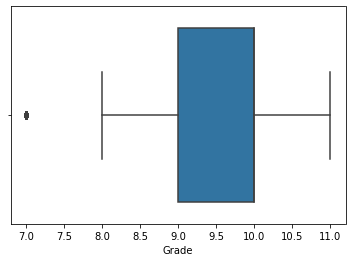

In [36]:
sb.boxplot(df[df['Grade']<=11]['Grade'])

In [37]:
df=df[df['Grade']<=10]

In [38]:
df.shape

(442781, 18)

In [39]:
df['Wealth'].sort_values(ascending =False).describe()

count    4.427810e+05
mean     7.046867e+05
std      1.588860e+06
min      8.001000e+03
25%      2.080010e+05
50%      4.100010e+05
75%      7.020010e+05
max      9.999999e+06
Name: Wealth, dtype: float64

<AxesSubplot:xlabel='Wealth'>

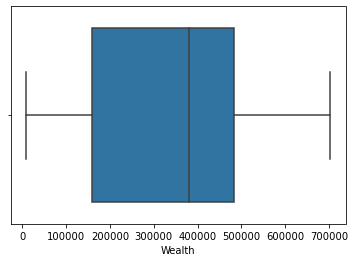

In [40]:
sb.boxplot(df[df['Wealth']<=7.030020e+05]['Wealth'])

## Bivariate Exploration #2

###  Is the wealth of family has an effect on students' scores?

In [41]:
df=df[df['Wealth']<=7.030020e+05]

In [42]:
df.shape

(341557, 18)

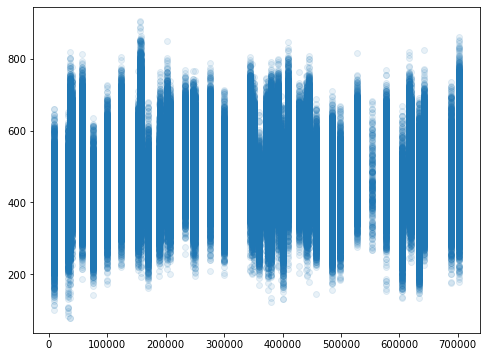

In [43]:
plt.figure(figsize = [8, 6])
plt.scatter(data = df, x = 'Wealth', y = 'Avg Math score', alpha = 1/10)
plt.show()

### From here we can see that there is no any relationship between Wealth and score

## Multivariate Exploration

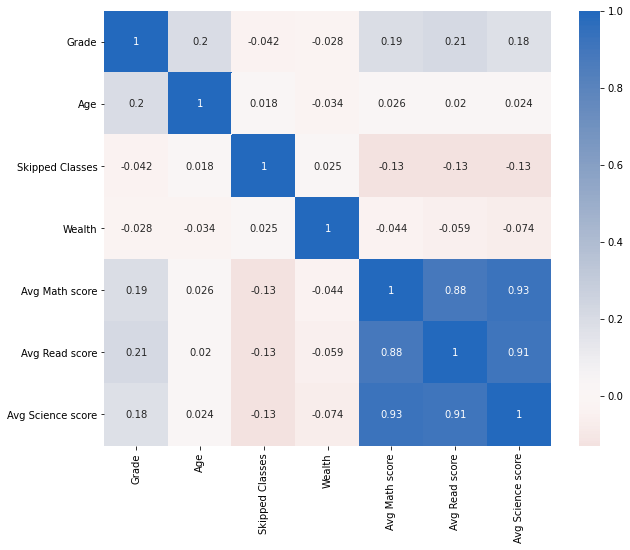

In [44]:
plt.figure(figsize = [10, 8])
sb.heatmap(df.corr(), annot = True,
           cmap = 'vlag_r', center = 0)
plt.show()

### There's a high correlation between Science scores and other subjects; Math and Reading

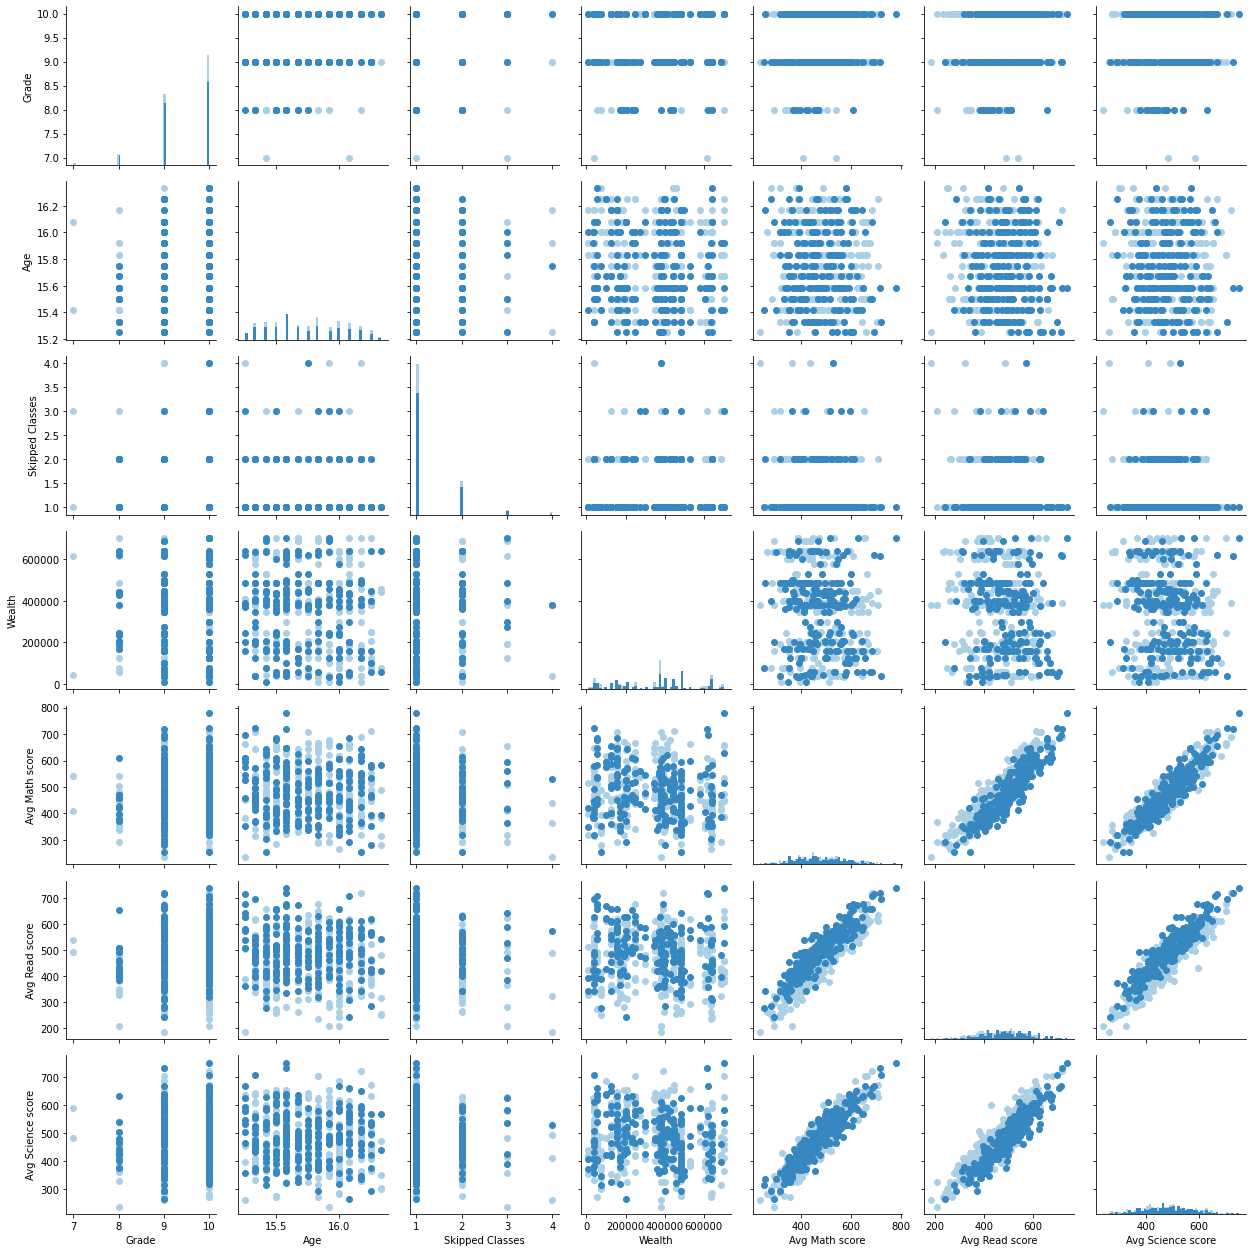

In [45]:
g = sb.PairGrid(data = df.sample(500) , hue="Gender" , palette = 'Blues')
g = g.map_diag(plt.hist , bins = 50);
g.map_offdiag(plt.scatter)
plt.tight_layout()

### Girls skippig classes more than boys and they got the lowest scores 
### Wealth and Age has no any relation between any variable

## Multivariate Exploration #1


### Which of genders has more scores? And what's the relation between number of books and score?

In [46]:
tmb = df.copy()

In [47]:
tmb.sort_values(by='Books at home',inplace=True)

In [48]:
df['Books at home'].unique()

array(['0-10 books ', '201-500 books ', 'More than 500 books',
       '11-25 books ', '101-200 books ', '26-100 books ', nan],
      dtype=object)

In [49]:

encoded_label = {'0-10 books ' : 0, '201-500 books ' : 4, 'More than 500 books' : 5,
       '11-25 books ': 1, '101-200 books ' : 3, '26-100 books ' : 2}
tmb['encoded'] = tmb['Books at home'].replace(encoded_label)
tmb.sort_values(by='encoded',inplace=True)

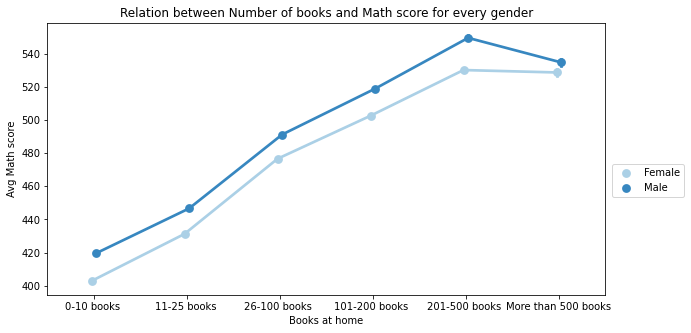

In [50]:
fig = plt.figure(figsize = [10,5])
ax = sb.pointplot(data = tmb, x = 'Books at home', y = 'Avg Math score', hue = 'Gender',palette = 'Blues',
                  linestyles = '-',dodge=True)
ax.legend(bbox_to_anchor=(1.15, 0.5))
plt.title('Relation between Number of books and Math score for every gender');
plt.show();

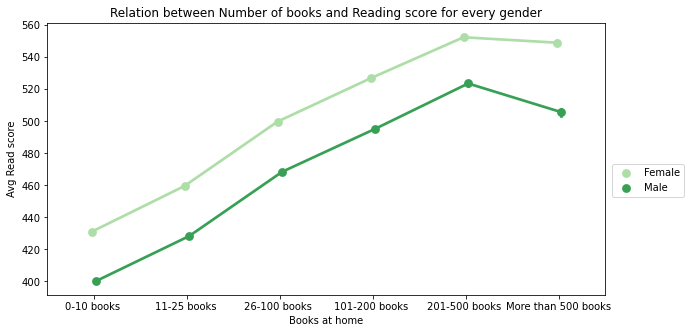

In [51]:
fig = plt.figure(figsize = [10,5])
ax = sb.pointplot(data = tmb, x = 'Books at home', y = 'Avg Read score', hue = 'Gender',palette = 'Greens',
                  linestyles = '-',dodge=True)
ax.legend(bbox_to_anchor=(1.15, 0.5))
plt.title('Relation between Number of books and Reading score for every gender');
plt.show();

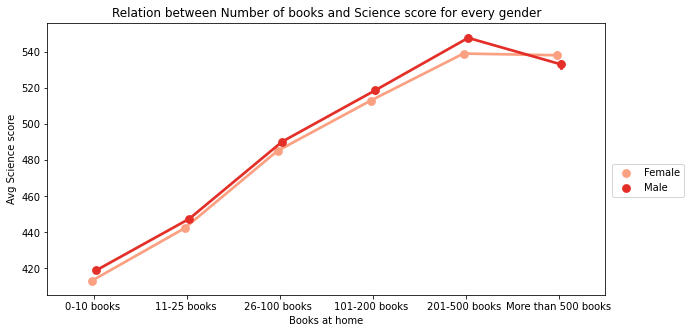

In [52]:
fig = plt.figure(figsize = [10,5])
ax = sb.pointplot(data = tmb, x = 'Books at home', y = 'Avg Science score', hue = 'Gender',palette = 'Reds',
                  linestyles = '-',dodge=True)
ax.legend(bbox_to_anchor=(1.15, 0.5))
plt.title('Relation between Number of books and Science score for every gender');
plt.show();

### Here we can see a positive correlation between a number of books and the score, Whereas, the higher the number of books, The higher the score students get. And this's very clear for students who have more than 200 books, We can see a very stark difference in score for those students.

### In general, boys score higher than girls in Math while girls score are much higher in reading. And they have nearly similiar score in science.

## Multivariate Exploration #2


### Does the presence of parents with the student affect his grades?

In [53]:
df['Parents at Home'] = df['Mother at Home'] + df['Father at Home']
df['Parents at Home'] = df['Parents at Home'].replace({'YesYes': 'Both', 'NoNo': 'None', 'YesNo': 'With Mother','NoYes': 'With Father'})

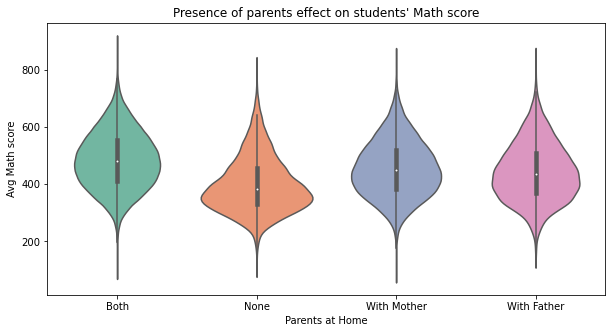

In [54]:

plt.figure(figsize = [10, 5])
sb.violinplot(data=df, x='Parents at Home', y='Avg Math score', palette="Set2");
plt.title("Presence of parents effect on students' Math score");


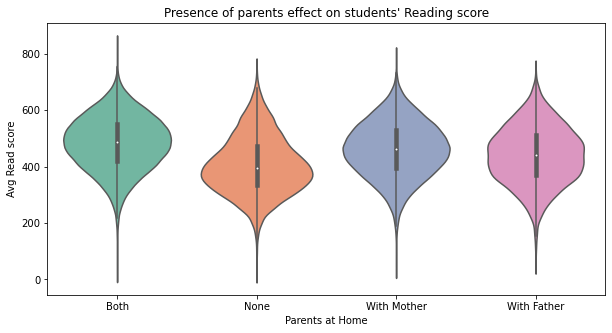

In [55]:

plt.figure(figsize = [10, 5])
sb.violinplot(data=df, x='Parents at Home', y='Avg Read score', palette="Set2");
plt.title("Presence of parents effect on students' Reading score");

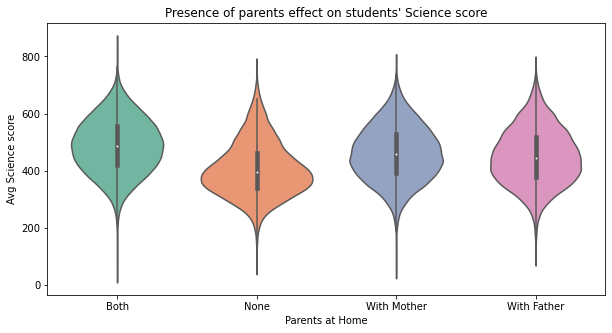

In [56]:

plt.figure(figsize = [10, 5])
sb.violinplot(data=df, x='Parents at Home', y='Avg Science score', palette="Set2");
plt.title("Presence of parents effect on students' Science score");

### As we see here it's obvious that students who are living alone had the least scores in all fields.
### They perform better when at least on of their parents are with them, And also the mother effect is a little more to get higher score, but undoubtedly students who are living with both parents are getting the highst scores.

## Multivariate Exploration #3


### Now we want to know the effect of family birth regions on the average score for the students

In [57]:
def count_countries(ss):
    """
    We will count 1 2 3 4 and 5 in which:
    1 means all family were born in the same country
    2 means two out of the three were born in different countries
    3,4 and 5 means all of them were originally from different countries
    """
    s = set()
    for t in str(ss).split(","):
        s.add(t)
    return len(s)

In [58]:
df['Birth Countries'] = df['Mother birth country'] + "," +  df['Father birth country'] + "," + df['Birth country'];
df['Birth Countries'].astype(str)

df['Family country'] = df['Birth Countries'].apply(count_countries);
df['Family country combination'] = df['Family country'].replace({1: 'Same Country', 2: 'Two Countries', 3:'Different Countries',
                                                                4:'Different Countries',5:'Different Countries'})
res = df.groupby('Family country combination').sum()['Family country'].sort_values()


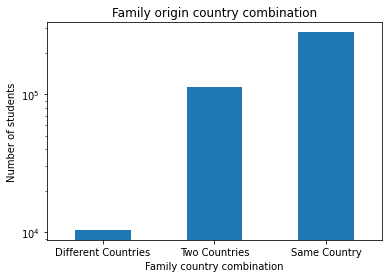

In [59]:
res.plot.bar(logy=True)
plt.title('Family origin country combination')
plt.ylabel('Number of students');
plt.xticks(rotation='horizontal');

### More than half of the students are from the same country of their parents, A good but not much amount of students had at leas one member of family from different country, But just a few students' family are from more than two countries

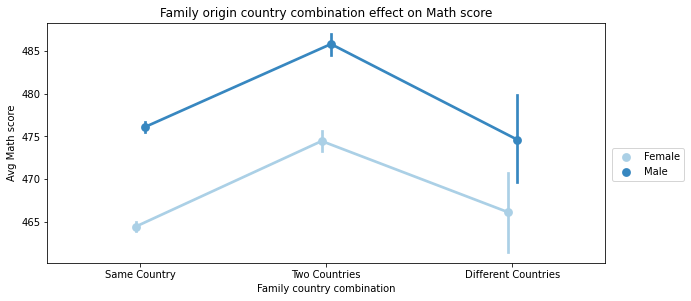

In [60]:
fig = plt.figure(figsize = [10,15])
plt.subplot(3, 1, 1)
ax = sb.pointplot(data = df, x = 'Family country combination', y = 'Avg Math score', hue = 'Gender',palette = 'Blues',
                  linestyles = '-',dodge=True)
ax.legend(bbox_to_anchor=(1.15, 0.5))
plt.title('Family origin country combination effect on Math score')
plt.show();

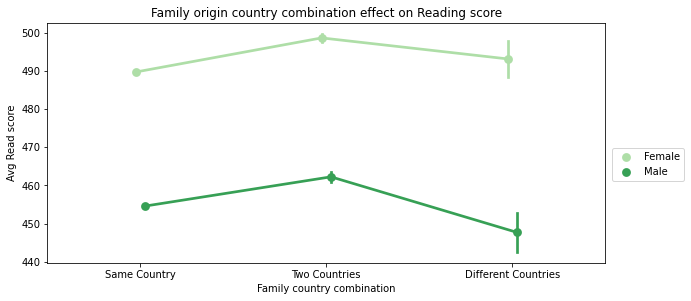

In [61]:
fig = plt.figure(figsize = [10,15])
plt.subplot(3, 1, 2)
ax = sb.pointplot(data = df, x = 'Family country combination', y = 'Avg Read score', hue = 'Gender',palette = 'Greens',
                  linestyles = '-',dodge=True)
ax.legend(bbox_to_anchor=(1.15, 0.5))
plt.title('Family origin country combination effect on Reading score')

plt.show();

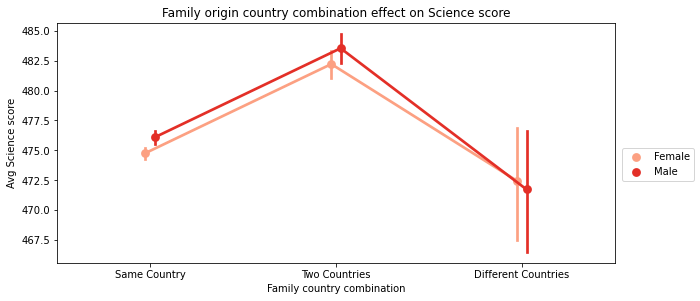

In [62]:
fig = plt.figure(figsize = [10,15])
plt.subplot(3, 1, 3)
ax = sb.pointplot(data = df, x = 'Family country combination', y = 'Avg Science score', hue = 'Gender',palette = 'Reds',
                  linestyles = '-',dodge=True)
ax.legend(bbox_to_anchor=(1.15, 0.5))
plt.title('Family origin country combination effect on Science score')

plt.show();

### Surprisingly the students who are in a two different countries family are getting the highst scores in all fields between all students, Then students from all different countries came in the scond place. We can estimate from this that the factor of foreign blood in family really brings a distinctive result of academic performance to the child.

# Colclusion
### From our results we can estimate that: 
> ### 1- Boys are better in math, and girls are better in reading, Both are nearly the same in science.
>### 2- Students from Asian countries are getting higher scores.
>### 3- Living with a parent is more effective to study better.
>### 4- Students who have more than 200 books have very big chance to get better scores.

In [64]:
!jupyter nbconvert exploration_template --to slides  --no-input --no-prompt

[NbConvertApp] Converting notebook exploration_template.ipynb to slides
[NbConvertApp] Writing 1313286 bytes to exploration_template.slides.html
